### In this project, we will compute the Gröbner basis of an ideal and visualize the corresponding curves. The goal is to demonstrate how Gröbner bases can be used to simplify and solve polynomial systems.

In [1]:
from sympy import symbols, groebner, pprint

In [2]:
# First, we define the variables
x, y = symbols('x y')

# Then, we define the polynomials in the ideal I
f1 = x**2 * y - 1
f2 = x * y**2 - x

# Computing the Groebner basis using lexicographic order (x > y)
G_lex = groebner([f1, f2], x, y, order='lex')

# Computeing the Groebner basis using graded lexicographic order (grlex)
G_grlex = groebner([f1, f2], x, y, order='grlex')

In [3]:
# Results
print("Gröbner Basis using Lexicographic Order (lex):")
pprint(G_lex)
print("\nGröbner Basis using Graded Lexicographic Order (grlex):")
pprint(G_grlex)

Gröbner Basis using Lexicographic Order (lex):
             ⎛⎡ 2       2    ⎤                           ⎞
GroebnerBasis⎝⎣x  - y, y  - 1⎦, x, y, domain=ℤ, order=lex⎠

Gröbner Basis using Graded Lexicographic Order (grlex):
             ⎛⎡ 2       2    ⎤                             ⎞
GroebnerBasis⎝⎣x  - y, y  - 1⎦, x, y, domain=ℤ, order=grlex⎠


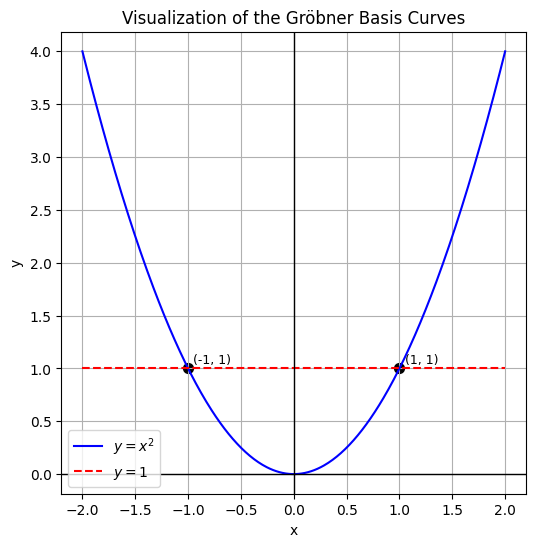

In [5]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np

# Defining the range of x values
x_vals = np.linspace(-2, 2, 400)

# Computing the y values for the parabola
y_parabola = x_vals**2

# Defining the horizontal lines
y_line1 = np.ones_like(x_vals)
y_line2 = -np.ones_like(x_vals)

# Plotting the curves
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_parabola, label='$y = x^2$', color='blue')
plt.plot(x_vals, y_line1, label='$y = 1$', color='red', linestyle='--')
#plt.plot(x_vals, y_line2, label='$y = -1$', color='green', linestyle='--')

# Marking intersection points
intersection_points = [(1, 1), (-1, 1)]
for point in intersection_points:
    plt.scatter(point[0], point[1], color='black', s=50)
    plt.text(point[0] + 0.05, point[1] + 0.05, f'({point[0]}, {point[1]})', fontsize=9)

# Additional formatting
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title('Visualization of the Gröbner Basis Curves')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Interpretation of Results

The graph above illustrates the curves obtained from the Gröbner basis of the ideal 

$$ I = \langle x^2y - 1, \; xy^2 - x \rangle $$

which simplifies to the polynomials \(x^2 - y\) and \(y^2 - 1\). The **blue curve** represents the parabola \(y = x^2\), while the **red and green dashed lines** correspond to the horizontal lines \(y = 1\) and \(y = -1\), respectively.

The intersection points \( (1, 1), (-1, 1) \) are the solutions to the original system of equations. These points highlight how the **Gröbner basis** provides a simplified and structured way of identifying the underlying relationships between the equations. 

Furthermore, the resulting curves show that the original system describes a **set of isolated points** where the polynomials intersect. This visualization confirms that the Gröbner basis calculation accurately captures the geometry of the solution set.


### Connection to Robotic Arms Kinematics

When we are modeling robotic arms, especially planar robots, we are essentially dealing with polynomial equations describing the position and orientation of the "hand" (or end-effector) as a function of the joint settings. The Gröbner basis can be used to solve these non-linear polynomial systems of equations and find the joint settings that correspond to a desired end-effector position.